## Import libraries

In [1]:
pip install lazypredict

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 13.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Load the data set

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
x = df.drop('pIC50', axis=1)
y = df.pIC50

## Data pre-processing

In [5]:
x.shape

(4695, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)
x.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Compare ML algorithms

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(x_train, x_test, y_train, y_test)

100%|█████████████████████████████████| 42/42 [01:16<00:00,  1.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.850902


In [10]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.42,0.51,1.06,0.13
HistGradientBoostingRegressor,0.42,0.51,1.07,0.37
XGBRegressor,0.40,0.48,1.09,9.10
RandomForestRegressor,0.39,0.48,1.09,4.49
SVR,0.38,0.47,1.11,0.72
NuSVR,0.37,0.46,1.11,0.59
BaggingRegressor,0.36,0.45,1.12,0.26
MLPRegressor,0.35,0.44,1.13,4.49
KNeighborsRegressor,0.31,0.41,1.17,0.09


In [11]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.42,0.51,1.06,0.13
HistGradientBoostingRegressor,0.42,0.51,1.07,0.37
XGBRegressor,0.40,0.48,1.09,9.10
RandomForestRegressor,0.39,0.48,1.09,4.49
SVR,0.38,0.47,1.11,0.72
NuSVR,0.37,0.46,1.11,0.59
BaggingRegressor,0.36,0.45,1.12,0.26
MLPRegressor,0.35,0.44,1.13,4.49
KNeighborsRegressor,0.31,0.41,1.17,0.09


## Data visualization of model performance

[(0.0, 1.0)]

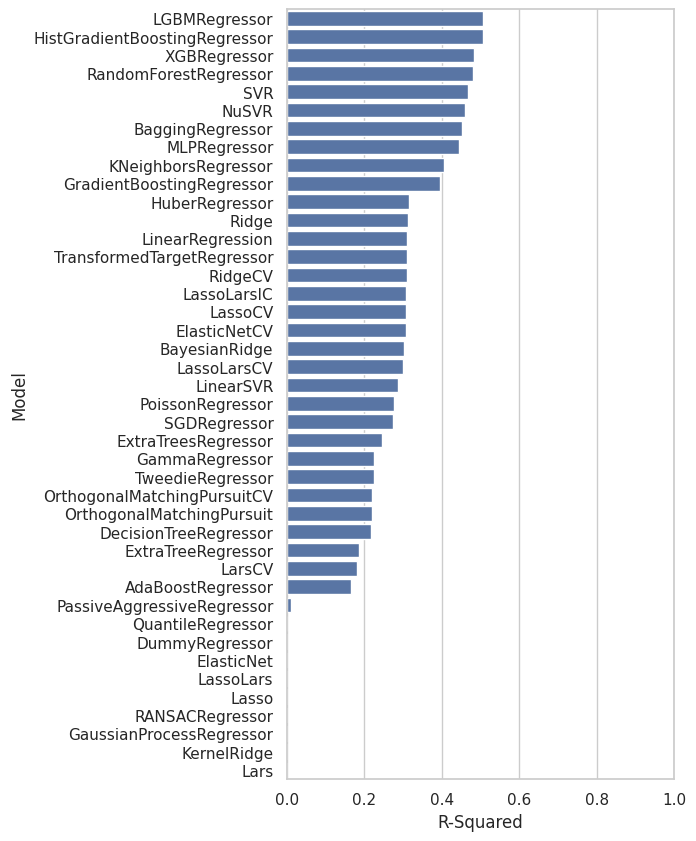

In [24]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='R-Squared', data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

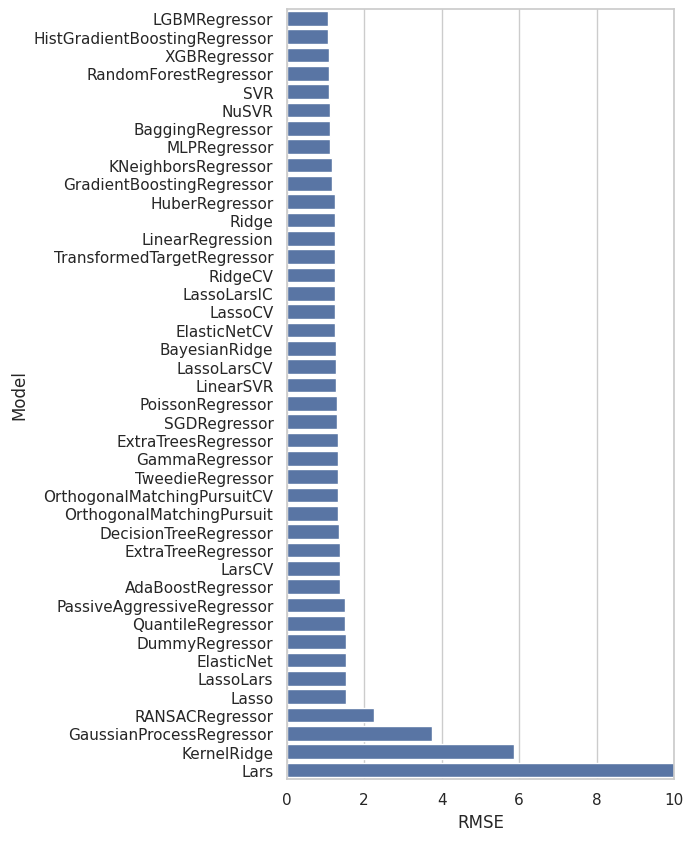

In [25]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='RMSE', data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

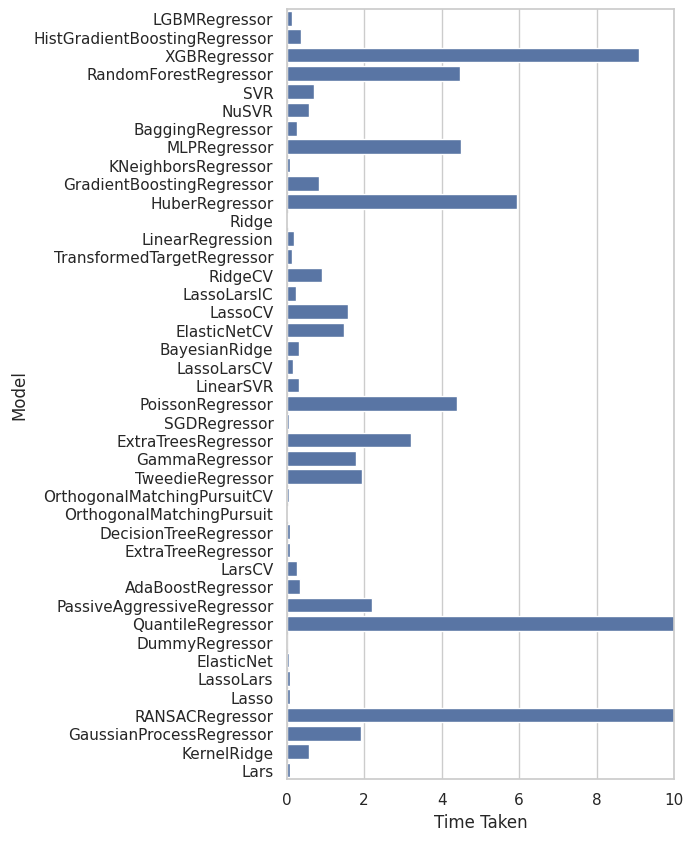

In [26]:
# Bart plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='Time Taken', data=train)
ax.set(xlim=(0, 10))